In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

#arbitrarily choose images/cameras
numChosen = 50
chosenImages = range(numChosen)


# initialize filepaths
## later implement input for directory
cDIR = os.getcwd()
NDPath = cDIR + r'\NotreDame\NotreDame'
listFile = NDPath + '\list.txt'
outFile = NDPath + r'\notredame.out'

In [2]:
### Extract the camera parameters and point correspondences from the output file, `notredame.out`, from Bundler


try:
    with open(outFile) as fp:
        print('Parsing data file...')
        line0 = fp.readline() #read line 0 (the title)
        total_num_cameras, total_num_points = map(int, fp.readline().strip('\n').split(' ')) #read line 1
        
        # placeholders
        camera_data = np.array([], dtype = float)
        points_3d = np.empty([total_num_points,3], dtype = float)
        points_3d_rgb = np.empty([total_num_points,3], dtype = int)
        #     view_list = np.empty(num_points, dtype = float)
        camera_index = np.array([], dtype = int)
        point_index = np.array([], dtype = int)
        xp = np.array([], dtype = float)
        yp = np.array([], dtype = float)
        total_num_views = 0
        num_cameras = numChosen
        num_line_holds = 0

        # extract camera parameters, starts reading on line 2
        for i in range(total_num_cameras):
            if chosenImages.count(i) == 1:
                c = 5
                if len(camera_data) == 0:
                    camera_data = np.array(fp.readline().strip('\n').split(' '),dtype = float)
                    c = 4
                for j in range(c):
                    camera_data = np.vstack([camera_data,np.array(fp.readline().strip('\n').split(' '),dtype = float)]) #reads 5 lines
            else:
                for k in range(5):
                    line_hold = fp.readline()
                    num_line_holds += 1

        # extract point correspondences of outputted 3D points, starts reading on line 2+num_cameras*5
        for i in range(total_num_points):
            points_3d[i] =  np.array(fp.readline().strip('\n').split(' '),dtype = float) #read 3D coordinates
            points_3d_rgb[i] = np.array(fp.readline().strip('\n').split(' '),dtype = int) #read RGB value
            line = np.array(fp.readline().strip('\n').split(' '),dtype = float) #read view list
            num_views = int(line[0])
            for j in range(num_views):
                cameraID = int(line[j*4+1])
    #             num_views_per_point = 0
                if chosenImages.count(cameraID) == 1: #does camera match chosen images?
    #                 num_views_per_point += 1
                    x = line[j*4+3]
                    y = line[j*4+4]
                    camera_index = np.append(camera_index,cameraID)
                    point_index = np.append(point_index,i)
                    xp = np.append(xp,x)
                    yp = np.append(yp,y)
                    total_num_views += 1
        print('Data parsing successsful')
except:
    print('Data parsing unsuccessful. Check data file format')
    print('Check the following numbers and vector lengths...:')
    print('  total_num_views:',total_num_views)
    unique_points = list(set(point_index))
    print('  num_unique_points:',len(unique_points))
    unique_cameras = list(set(camera_index))
    print('  num_uniqe_cameras:',len(unique_cameras))
    unique_points = points_3d[list(set(point_index))]
    print('  total_num_cameras: ',total_num_cameras)
    print('  total_num_points: ', total_num_points)
    print('  number of cameras chosen: ', numChosen)
    print('  length of camera_index: ',len(camera_index))
    print('  length of point_index: ',len(point_index))
    print('  length of xp: ',len(xp))
    print('  total_num_views: ', total_num_views)
    print('  Final iteration in points parsing loop: ',i)

if ((len(camera_index)==len(point_index)) and (len(point_index) == len(xp)) 
    and (len(xp)==len(yp)) and (len(yp)==total_num_views)):
    print('Vector lengths match')
    print('-Numbers of interest-')
    unique_points = list(set(point_index))
    print('  num_unique_points: ',len(unique_points))
    unique_cameras = list(set(camera_index))
    print('  num_uniqe_cameras: ',len(unique_cameras))
    print('  number of cameras chosen: ', numChosen)
    num_cameras = numChosen
    num_points = len(unique_points)
    print('  total_num_views: ', total_num_views)
else:
    print('Data parsing unsuccessful. Check data file format. Number of views and points do not match')

               
# for i in range(num_cameras):
#     camera = Camera()
#     camera.f = camera_data[i*5,0]
#     camera.k1 = camera_data[i*5,1]
#     camera.k2 = camera_data[i*5,2]
#     camera.R = camera_data[i*5+1:i*5+4] #
#     camera.t = camera_data[i*5+4]
#     cameras.append(camera)

Parsing data file...
Data parsing successsful
Vector lengths match
Numbers of interest...:
  num_unique_points:  22647
  num_uniqe_cameras:  50
  number of cameras chosen:  50
  total_num_views:  31466


In [15]:
print('Check the following numbers and vector lengths...:')
print('total_num_views:',total_num_views)
unique_points = list(set(point_index))
print('num_unique_points:',len(unique_points))
unique_cameras = list(set(camera_index))
print('num_uniqe_cameras:',len(unique_cameras))
print('total_num_cameras: ',total_num_cameras)
print('total_num_points: ', total_num_points)
print('length of camera_index: ',len(camera_index))
print('length of point_index: ',len(point_index))
print('length of xp: ',len(xp))
print('total_num_views: ', total_num_views)
print('Final iteration in points parsing loop: ',i)
# with open(outFile) as f:
#     for i, line in enumerate(f):
#         if i == total_num_cameras*5 + 3:
#             print(line)

Check the following numbers and vector lengths...:
total_num_views: 31466
num_unique_points: 22647
num_uniqe_cameras: 50
total_num_cameras:  715
total_num_points:  127431
length of camera_index:  31466
length of point_index:  31466
length of xp:  31466
total_num_views:  31466
Final iteration in points parsing loop:  127430


In [ ]:
num_line_holds/5

In [21]:
### Define functions

def project(point, camera_params):
    """Convert 3-D points to 2-D by projecting onto images."""
    
    # allocate camera parameters
    R = camera_params[1:4,:]
    t = camera_params[4]
    f,k1,k2 = camera_params[0]
    
    Q = np.matmul(R,np.transpose(point)) + np.transpose(t) #convert real world to camera coordinates
    q = -Q[:2]/Q[2] #perspective division
    q2 = np.linalg.norm(q)
    p = f*(1+k1*q2+k2*q2*q2)*q #convert to pixel coordinates
    
    return p

x0 = np.hstack((camera_data.ravel(), points_3d[point_index].ravel()))
points_2d = np.transpose([xp,yp])

def batch_project(params, point_index, camera_index, total_num_views, num_cameras, num_points):
    camera_params = params[:num_cameras*5*3].reshape((num_cameras*5,3))
    points_3d = params[num_cameras*5*3:].reshape((total_num_views,3))
    point_proj = np.empty([total_num_views,2])
    for i in range(total_num_views):
        point_proj[i] = project(points_3d[i],camera_params[camera_index[i]*5:camera_index[i]*5+5,:])
    
    return point_proj

def collect_unique(points_3d, point_index, camera_data, camera_index, chosenImages):
    """ Collect only those cameras and 3D points from the full dataset that appear in the chosen image set"""
    unique_points = points_3d[list(set(point_index))]
    
    
def fun(params, point_index, camera_index, total_num_views, num_cameras, num_points, points_2d):
    """Compute residuals.
    
    `params` contains camera parameters and 3-D coordinates.
    """
    points_proj = batch_project(params, point_index, camera_index, total_num_views, num_cameras, num_points)
    
    return (points_proj - points_2d).ravel()

from scipy.sparse import lil_matrix

def sparseJacobian(num_cameras, num_points, camera_index, point_index, total_num_views):
    m = total_num_views * 2
    n = num_cameras * 15 + num_points * 3
    A = lil_matrix((m, n), dtype=int)

    i = np.arange(total_num_views)
    for s in range(15):
        A[2 * i, camera_index * 15 + s] = 1
        A[2 * i + 1, camera_index * 15 + s] = 1

    for s in range(3):
        A[2 * i, num_cameras * 15 + point_index * 3 + s] = 1
        A[2 * i + 1, num_cameras * 15 + point_index * 3 + s] = 1

    return A

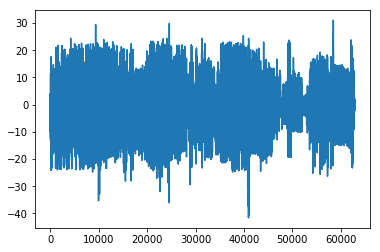

In [12]:
residuals = fun(x0, point_index, camera_index, total_num_views, num_cameras, num_points, points_2d)
plt.plot(residuals)

In [22]:
68691/3
B = sparseJacobian(20,45,np.arange(20),np.array([1,0]),3)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [27]:
A = sparseJacobian(num_cameras, num_points, camera_index, point_index, total_num_views)
### Optimize (least squares)
import time
from scipy.optimize import least_squares
t0 = time.time()
res = least_squares(fun, x0, verbose=2, ftol=1e-4,
                    args=(point_index, camera_index, total_num_views, num_cameras, num_points, points_2d))
t1 = time.time()
print("Optimization took {0:.0f} seconds".format(t1 - t0))


MemoryError: 

In [ ]:
plt.plot(res.fun)
(17675/60)/60
res.x.size